In [1]:
from torch.utils.data import Dataset
from utils.data import read_csv, data_filter
from utils.constants import *
import os
import numpy as np
import pandas as pd
from skimage import io
from transform import Rescale, RandomHorizontalFlip, RandomVerticalFlip, ToTensor
from utils.vis import show_arrow_batch, show_image_batch
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from dataset import PlanktonDataset

In [2]:
img_dir = '/data5/Plankton_wi18/rawcolor_db2/images'
csv_filename = 'data/data_train.csv'

In [3]:
transformed_dataset = PlanktonDataset(csv_file=csv_filename,
                                      img_dir=img_dir,
                                      transform=transforms.Compose([
                                          Rescale((224, 224)),
                                          RandomHorizontalFlip(),
                                          RandomVerticalFlip(),
                                          ToTensor()
                                      ]))

In [4]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)

(0, torch.Size([4, 3, 224, 224]), torch.Size([4, 4]), torch.Size([4, 3, 48, 48]), {'specimen_id': ['20170307_002', '20170124_001', '20170217_003', '20170221_001'], 'genus': ['Acartia', 'Gammaridae (Family)', 'Poecilostomatoida (Family)', 'Brachyura (Family)'], 'order': ['Calanoida', 'Amphipoda', 'Cyclopoida', 'Decapoda'], 'family': ['Acartidae', 'Gammaridae', 'Poecilostomatoida', 'Brachyura']})
(1, torch.Size([4, 3, 224, 224]), torch.Size([4, 4]), torch.Size([4, 3, 48, 48]), {'specimen_id': ['20170425_005', '20170207_001', '20170214_002', '20170224_008'], 'genus': ['Acartia', 'Centropagidae (Family)', 'Centropagidae (Family)', 'Hydromedusae (Order)'], 'order': ['Calanoida', 'Calanoida', 'Calanoida', 'Hydromedusae'], 'family': ['Acartidae', 'Centropagidae', 'Centropagidae', 'Hydromedusae (Order)']})
(2, torch.Size([4, 3, 224, 224]), torch.Size([4, 4]), torch.Size([4, 3, 48, 48]), {'specimen_id': ['20170210_002', '20170306_004', '20170427_003', '20170306_007'], 'genus': ['Hydromedusae (O

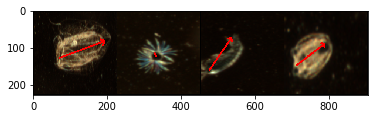

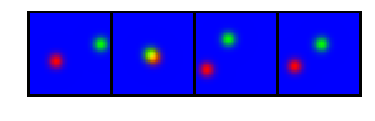

In [5]:
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['coordinates'].size(),
          sample_batched['target_map'].size(),
          sample_batched['cls'])

    if i_batch == 3:
        plt.figure()
        show_arrow_batch(sample_batched)
        plt.figure()
        show_image_batch(sample_batched['target_map'])
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [6]:
for data in dataloader:
    inputs, target_class, target_map, coordinates = \
        data['image'], data['class_index'], data['target_map'], data['coordinates']
    print(target_class)
    break


 13
 14
  3
 10
[torch.LongTensor of size 4]

